<a href="https://colab.research.google.com/github/Sreenathkk00/Machine-Learning-Projects/blob/main/movie_recommendation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

---



# **Objective**



 The objective of this project is to build a movie recommendation system that can predict the rating a user would give to a movie based on their past ratings and the ratings of other users. This system can be used to provide personalized movie recommendations to users, helping them discover new movies that they might enjoy.

 The system will be built using the following steps:

 1. **Data Collection**: Collect a dataset of movie ratings from users. This data can be collected through surveys, online platforms, or existing datasets.
 2. **Data Preprocessing**: Clean the data and prepare it for analysis. This may involve removing missing values, correcting errors, and normalizing the data.
 3. **Model Training**: Train a machine learning model on the preprocessed data. This model will learn the relationship between user ratings and movie characteristics.
 4. **Model Evaluation**: Evaluate the performance of the trained model using various metrics such as root mean squared error (RMSE) or precision and recall.
 5. **Deployment**: Deploy the trained model in a production environment where it can be used to provide personalized movie recommendations to users.


# **Data Source**



*   The data source is a CSV file hosted on GitHub, within the YBI-Foundation/Dataset repository. The file is named "Movies Recommendation.csv" and contains information about movies such as genre, keywords, tagline, cast, director, and potentially ratings




# **import libraries**

In [150]:
# import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib
import matplotlib.pyplot as plt

# **Import Data**

In [151]:
# import csv file to dataframe
dataset = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv')


# **Describe Data**

In [152]:
dataset.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

# **Data Visualization**

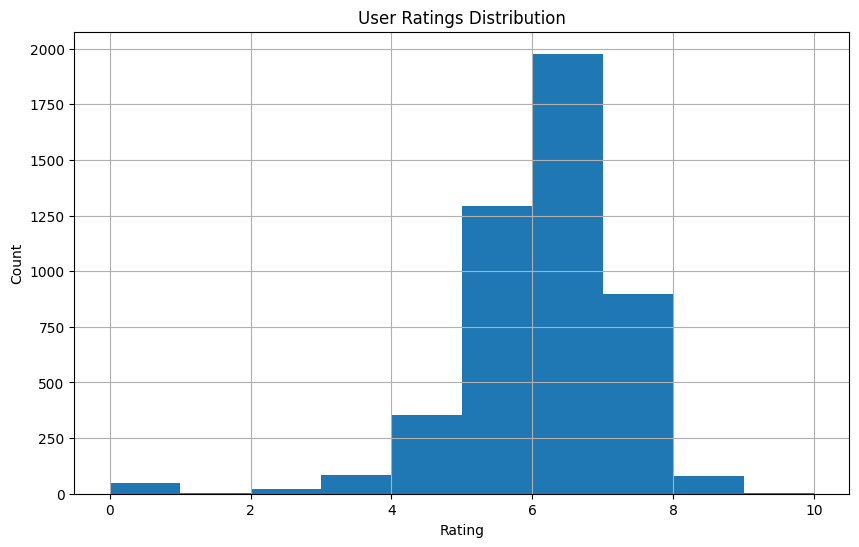

In [154]:
# pyplot as plt
plt.figure(figsize=(10,6))
dataset['Movie_Vote'].hist(bins=10)
plt.title('User Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# **Data Preprocessing**

In [155]:
# shape of dataset
dataset.shape

(4760, 21)

In [156]:
# check if there is any null values
dataset.columns.isnull().sum()

0

In [157]:
# select the feature data for the process
feature_data= dataset[['Movie_Genre','Movie_Keywords','Movie_Tagline','Movie_Cast','Movie_Director']]
feature_data

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4755,Horror,NaN,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4756,Comedy Family Drama,NaN,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4758,Family,NaN,NaN,NaN,NaN


In [158]:
# fill NA
for i in feature_data:
    dataset[i]=dataset[i].fillna('')

# compain all the datas in  row vice

In [159]:
compained_feature = dataset['Movie_Genre']+'  '+dataset['Movie_Keywords']+'  '+dataset['Movie_Tagline']+'  '+dataset['Movie_Director']
compained_feature

0       Crime Comedy  hotel new year's eve witch bet h...
1       Adventure Action Science Fiction  android gala...
2       Animation Family  father son relationship harb...
3       Comedy Drama Romance  vietnam veteran hippie m...
4       Drama  male nudity female nudity adultery midl...
                              ...                        
4755    Horror    The hot spot where Satan's waitin'. ...
4756    Comedy Family Drama    It’s better to stand ou...
4757    Thriller Drama  christian film sex trafficking...
4758                                         Family      
4759    Documentary  music actors legendary perfomer c...
Length: 4760, dtype: object

# convert text values in to numeric values

In [160]:
vc = TfidfVectorizer()
vector_feature = vc.fit_transform(compained_feature)
vector_feature.shape

(4760, 9666)

# Cosine Similarity
for checking the similarity datas in feature

In [161]:
similarity=cosine_similarity(vector_feature)
print(similarity)

[[1.         0.01723123 0.04583093 ... 0.         0.         0.        ]
 [0.01723123 1.         0.01127435 ... 0.         0.         0.        ]
 [0.04583093 0.01127435 1.         ... 0.         0.09498713 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.09498713 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [162]:
moive_name = input('Enter Movie Name| : ')

Enter Movie Name| : finding nemo


In [163]:
# select all the movies_title in to list
lis_mov_title = dataset['Movie_Title'].tolist()
print(lis_mov_title)

['Four Rooms', 'Star Wars', 'Finding Nemo', 'Forrest Gump', 'American Beauty', 'Dancer in the Dark', 'The Fifth Element', 'Metropolis', 'My Life Without Me', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Kill Bill: Vol. 1', 'Jarhead', 'Apocalypse Now', 'Unforgiven', 'The Simpsons Movie', 'Eternal Sunshine of the Spotless Mind', 'Amores perros', "Pirates of the Caribbean: Dead Man's Chest", 'A History of Violence', '2001: A Space Odyssey', '8 Mile', 'Absolute Power', 'Brazil', 'Walk the Line', 'Million Dollar Baby', 'Billy Elliot', 'American History X', 'War of the Worlds', 'Mars Attacks!', 'Before Sunrise', 'Memento', 'Blade Runner', 'Hero', 'Before Sunset', 'Open Water', 'Raiders of the Lost Ark', 'Indiana Jones and the Temple of Doom', 'Indiana Jones and the Last Crusade', 'Beverly Hills Cop', 'Armageddon', 'Beverly Hills Cop II', 'Gladiator', 'Lock, Stock and Two Smoking Barrels', 'Taxi Driver', 'Run Lola Run', 'Back to the Future', 'Predator', 'Snatch', 'Scarface', 'Pr

In [164]:
# find the close match of the movies
find_close_match = difflib.get_close_matches(moive_name,lis_mov_title)
find_close_match

['Finding Nemo']

In [165]:
# display the  close match movies
close_match = find_close_match[0]
close_match

'Finding Nemo'

In [166]:
# find the index of the movie with title
index_of_title = dataset[dataset.Movie_Title==close_match]['Movie_ID'].values[0]
print(index_of_title)


3


In [167]:
# get the similar movies
lis_of_similar_mv = list(enumerate(similarity[index_of_title]))
print(lis_of_similar_mv)

[(0, 0.0397815352135813), (1, 0.0), (2, 0.014676946430384837), (3, 0.9999999999999999), (4, 0.0042848638560289976), (5, 0.07853343272031578), (6, 0.016765479777578786), (7, 0.07671570250323426), (8, 0.015064770367183164), (9, 0.04512876784211686), (10, 0.020681210374160923), (11, 0.02151881853572398), (12, 0.08810337325378681), (13, 0.09953948643238572), (14, 0.02113046973030611), (15, 0.030771756552393253), (16, 0.003684918606245299), (17, 0.0), (18, 0.020556770591024794), (19, 0.013427924643886237), (20, 0.003999249257211006), (21, 0.004528955674457318), (22, 0.03018018969817499), (23, 0.013778477842365135), (24, 0.002212076857260467), (25, 0.04106279872864996), (26, 0.0038724253114355736), (27, 0.0), (28, 0.0580096020614362), (29, 0.05200257334887265), (30, 0.0), (31, 0.017626492880625896), (32, 0.03777856941341633), (33, 0.0456796936039697), (34, 0.019248625924601512), (35, 0.07343195571757521), (36, 0.03550878341679961), (37, 0.06646228049404485), (38, 0.044843429274560705), (39, 

In [168]:
# length of the similar movies
len(lis_of_similar_mv)

4760

In [169]:
# sort the similar movies list
sort_similar_mv = sorted(lis_of_similar_mv,key=lambda x:x[1],reverse=True)
print(sort_similar_mv)

[(3, 0.9999999999999999), (941, 0.21762314904042152), (452, 0.2077079649582454), (164, 0.2055570518076703), (206, 0.1920567886309846), (2027, 0.19137382911549222), (751, 0.19050051298963452), (524, 0.18355900180585502), (197, 0.1824903671416148), (3866, 0.18244892521773304), (1048, 0.17769885072353894), (2949, 0.17538952465980584), (1936, 0.16800856041530224), (2595, 0.16535806179612142), (388, 0.1653008019369267), (919, 0.16192665506336057), (1087, 0.16165154103244328), (307, 0.16055617581393444), (3364, 0.156329492790672), (1340, 0.15454930661578592), (4712, 0.15430078409820516), (2403, 0.15362108400064858), (4467, 0.15196353385124148), (4533, 0.14870657337652746), (2848, 0.1460897704503957), (2650, 0.14592749738272587), (1120, 0.14590996197098047), (3747, 0.1457713932094447), (2043, 0.14508929388730712), (1858, 0.1448376342390803), (1278, 0.14295541594097894), (852, 0.1423729941502314), (1701, 0.14061719329698483), (2256, 0.13958820874378275), (3285, 0.13930052763709866), (4299, 0.1

In [170]:
# print sugested movies
print('Top 30 movies suggested for you : \n')
i=1
for movie in sort_similar_mv:
    index = movie[0]
    suggested_movs = dataset[dataset.index==index]['Movie_Title'].values[0]
    if (i<31):
        print(i,' ',suggested_movs)
        i+=1



Top 30 movies suggested for you : 

1   Forrest Gump
2   Elling
3   Letters from Iwo Jima
4   Rain Man
5   The Green Mile
6   The Deer Hunter
7   Memoirs of an Invisible Man
8   What's Eating Gilbert Grape
9   As It Is in Heaven
10   Silver Linings Playbook
11   Gigli
12   Lake Mungo
13   The Musketeer
14   A Christmas Carol
15   Dangerous Liaisons
16   Space Cowboys
17   Cast Away
18   Contact
19   Molly
20   A Prairie Home Companion
21   Dancin' It's On
22   Last Orders
23   Allegiant
24   The Walk
25   The Time Traveler's Wife
26   A Home at the End of the World
27   The Happening
28   The Host
29   Renaissance Man
30   The Postman Always Rings Twice


# Top 10 movies Recommendation

In [177]:
# Prompt user to input a movie name
moive_name = input('Enter Movie Name : ')

# Select all the movie titles into a list
lis_mov_title = dataset['Movie_Title'].tolist()

# Find the closest match to the entered movie name
find_close_match = difflib.get_close_matches(moive_name, lis_mov_title)

# Select the closest match
close_match = find_close_match[0]

# Get the index of the movie title that matches the close match
index_of_title = dataset[dataset.Movie_Title == close_match]['Movie_ID'].values[0]

# Calculate recommendation scores based on similarity index
recommendation_score = list(enumerate(similarity[index_of_title]))

# Sort the similar movies based on recommendation scores in descending order
sort_similar_mv = sorted(recommendation_score, key=lambda x: x[1], reverse=True)

# Print the top 10 suggested movies
print('Top 10 Movies Suggested For You : \n')
i = 1
for movie in sort_similar_mv:
    index = movie[0]
    suggested_movs = dataset[dataset.index == index]['Movie_Title'].values[0]
    if (i < 10):
        print(i, ' ', suggested_movs)
        i += 1



Enter Movie Name : forrest gumb
Top 10 Movies Suggested For You : 

1   American Beauty
2   Losin' It
3   The Rage: Carrie 2
4   Jason Goes to Hell: The Final Friday
5   The Boy Next Door
6   Revolutionary Road
7   Love Actually
8   The Wraith
9   Eastern Promises


# Conclusion

This project demonstrates the development of a movie recommendation system using Python libraries such as pandas, scikit-learn, and matplotlib. The system provides personalized movie recommendations based on user ratings and similarities between movies.

Key steps include data preprocessing, similarity calculation using cosine similarity, and generating recommendations based on similarity scores and past ratings.

The project serves as a useful tool for movie enthusiasts and businesses looking to provide personalized movie suggestions. Future improvements could involve incorporating additional data sources like user reviews and exploring advanced machine learning models for enhanced accuracy and personalization.

Overall, this project showcases the effectiveness of Python libraries in building a robust movie recommendation system.


